In [1]:
# Importing the libraries
import torch
#from torchviz import make_dot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import NN_classes

In [2]:
execution = "Network_Full_Generation_Full"
sc = "sc01"
period = "2030"
train_size = 0.8

In [3]:
#Read the data from desired execution
df_in = pd.read_csv(f"Data/RTS_24/input_f_{sc}_{execution}_{period}.csv",header=[0,1])
df_out = pd.read_csv(f"Data/RTS_24/output_f_{sc}_{execution}_{period}.csv",header=[0,1])

#Drop the first row because its useless 
df_in = df_in.drop([0])
df_out = df_out.drop([0])

#Focus for now only on the real part of the input data: 
df_in = df_in["Value_R"]
df_out = df_out["Value"]

#Convert to numpy array and normalize the columns of the input, sum the columns of the output: 
np_in = df_in.to_numpy()
np_in = np_in/np.abs(np_in.max(axis=0))
np.nan_to_num(np_in,0)
np_out = df_out.to_numpy().sum(axis=1)

#Convert to torch tensors
t_in = torch.from_numpy(np_in)
t_out = torch.from_numpy(np_out)

#And split into train and test set: 
train_size = 0.8
nb_train = int(train_size*len(t_out))
tr_in,te_in = t_in[:nb_train],t_in[nb_train:]
tr_out,te_out = t_out[:nb_train],t_out[nb_train:]

tr_in,te_in,tr_out,te_out= train_test_split(t_in,t_out,test_size=0.3,shuffle=False)


C:\Users\u0138303\AppData\Local\Temp\ipykernel_40020\2948490251.py:15: RuntimeWarning: invalid value encountered in divide
  np_in = np_in/np.abs(np_in.max(axis=0))


In [4]:
def train_and_get_loss(model,nb_epochs,lr): 
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(nb_epochs):
        model.train()
        optimizer.zero_grad()
        # Forward pass
        train_predictions = model(tr_in.float())
        train_loss = torch.nn.MSELoss()(train_predictions.float().squeeze(), tr_out.float())

        # Backward pass
        # optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        #Print the training loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss.item()}')
    train_predictions = model(tr_in.float())
    train_loss = torch.nn.MSELoss()(train_predictions.float().squeeze(), tr_out.float())
    return train_loss

In [5]:
# Train the model
model_1 = NN_classes.ObjectiveEstimator_ANN_Single_layer(input_size=tr_in.shape[1],output_size=1)
# model_2 =NN_classes.ObjectiveEstimator_ANN_3hidden_layer(input_size=tr_in.shape[1],hidden_size1 =tr_in.shape[1]/4,hidden_size2 =tr_in.shape[1]/16,hidden_size3 =int(tr_in.shape[1]/64),output_size=1)
model_2 =NN_classes.ObjectiveEstimator_ANN_3hidden_layer(input_size=tr_in.shape[1],hidden_size1 =int(tr_in.shape[1]/4),hidden_size2 =int(tr_in.shape[1]/16),hidden_size3 =10,output_size=1)
model_3 =NN_classes.ObjectiveEstimator_ANN_2hidden_layer(input_size=tr_in.shape[1],hidden_size1 =int(tr_in.shape[1]/4),hidden_size2 =16,output_size=1)

train_and_get_loss(model_1,300,0.1)
train_and_get_loss(model_2,300,0.01)
train_and_get_loss(model_3,300,0.01)


Epoch 10, Train Loss: 25.940345764160156
Epoch 20, Train Loss: 8.472665786743164
Epoch 30, Train Loss: 3.556011199951172
Epoch 40, Train Loss: 3.2484114170074463
Epoch 50, Train Loss: 2.0646233558654785
Epoch 60, Train Loss: 1.4166297912597656
Epoch 70, Train Loss: 0.8706783056259155
Epoch 80, Train Loss: 0.5580230355262756
Epoch 90, Train Loss: 0.3471108675003052
Epoch 100, Train Loss: 0.20958591997623444
Epoch 110, Train Loss: 0.12472976744174957
Epoch 120, Train Loss: 0.0745474323630333
Epoch 130, Train Loss: 0.045726627111434937
Epoch 140, Train Loss: 0.029541902244091034
Epoch 150, Train Loss: 0.020751776173710823
Epoch 160, Train Loss: 0.01604769378900528
Epoch 170, Train Loss: 0.013539960607886314
Epoch 180, Train Loss: 0.01220410130918026
Epoch 190, Train Loss: 0.011485239490866661
Epoch 200, Train Loss: 0.011091729626059532
Epoch 210, Train Loss: 0.01087165903300047
Epoch 220, Train Loss: 0.010744599625468254
Epoch 230, Train Loss: 0.010667678900063038
Epoch 240, Train Loss: 0

tensor(0.0043, grad_fn=<MseLossBackward0>)

Test Loss: 0.0070153106935322285


([<matplotlib.lines.Line2D at 0x193b9e3ca90>],
 <matplotlib.legend.Legend at 0x193ac38a8f0>)

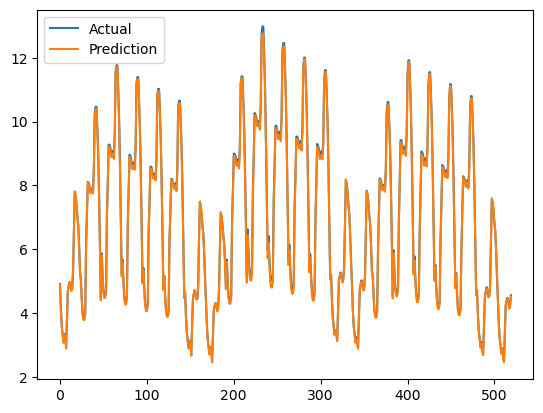

In [6]:
# Visual evalution of model on training set
start = 480
end = 1000
train_predictions = model_2(tr_in.float())
train_loss = torch.nn.MSELoss()(train_predictions.float().squeeze(), tr_out.float())
print(f'Test Loss: {train_loss.item()}')
plt.plot(tr_out[start:end],label = "Actual")
plt.plot(train_predictions.detach()[start:end],label = "Prediction"),plt.legend()

In [7]:
# Evaluate the model on the test set
s = 0
e = 1500
test_predictions = model(te_in.float())
test_loss = torch.nn.MSELoss()(test_predictions.float().squeeze(), te_out.float())
print(f'Test Loss: {test_loss.item()}')
plt.plot(test_predictions.detach()[s:e],label = "Prediction")

plt.plot(te_out[s:e],label = "Actual")
plt.legend()

NameError: name 'model' is not defined